# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ".output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [7]:
city_names_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
print("Beginning Data Retrieval  ")
print("---------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do the below
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_names_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")
        

Beginning Data Retrieval  
---------------------------------
Processing Record 21 of Set 1 : avarua
Processing Record 22 of Set 1 : kieta
Processing Record 23 of Set 1 : albany
Processing Record 24 of Set 1 : puerto ayora
Processing Record 25 of Set 1 : punta arenas
Processing Record 26 of Set 1 : vaini
Processing Record 27 of Set 1 : santa rosa
Processing Record 28 of Set 1 : yellowknife
Processing Record 29 of Set 1 : atuona
Processing Record 30 of Set 1 : cape town
City not found. Skipping...
Processing Record 31 of Set 1 : anadyr
Processing Record 32 of Set 1 : port elizabeth
Processing Record 33 of Set 1 : busselton
Processing Record 34 of Set 1 : boddam
City not found. Skipping...
Processing Record 35 of Set 1 : sitka
Processing Record 36 of Set 1 : mar del plata
Processing Record 37 of Set 1 : khatanga
Processing Record 38 of Set 1 : quimper
Processing Record 39 of Set 1 : santa maria
Processing Record 40 of Set 1 : gladstone
City not found. Skipping...
Processing Record 41 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create a panda dataframe using retrieved data
weather_dict = pd.DataFrame({
    "City": city_names_list,
    "Cloudiness": cloudiness_list,
    "Country":country_list,
    "Date": date_list,
    "Humidity": humidity_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Wind Speed": wind_speed_list
})

In [12]:
# Count data
weather_dict.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [13]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Avarua,40,CK,1619663077,74,-21.2078,-159.7750,84.20,9.22
1,Kieta,100,PG,1619663196,80,-6.2167,155.6333,81.63,0.43
2,Albany,78,US,1619662823,88,42.6001,-73.9662,57.99,2.15
3,Puerto Ayora,29,EC,1619663133,88,-0.7393,-90.3518,75.27,5.55
4,Punta Arenas,75,CL,1619663048,81,-53.1500,-70.9167,41.00,17.27
...,...,...,...,...,...,...,...,...,...
567,Trelew,41,AR,1619663767,56,-43.2490,-65.3051,65.28,9.44
568,Maragogi,20,BR,1619663768,82,-9.0122,-35.2225,77.40,5.86
569,Tezu,64,IN,1619663248,21,27.9167,96.1667,91.11,2.77
570,Yangi Marg`ilon,0,UZ,1619663259,26,40.4272,71.7189,71.60,2.30


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [15]:
# Save city data to a csv file
# weather_dict.to_csv("../output_data/cities.csv", index = False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

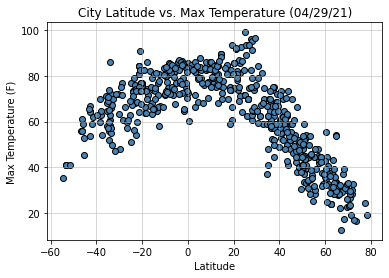

In [17]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set Title
plt.title("City Latitude vs. Max Temperature (04/29/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set gril line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitde vs Max Temperature.png")

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression